# A1. Centrifugation is unnecessary when determining Protein concentration
## Protocol
**D0 - Seeding**
- Seed cells into 96-Well plate in descending concentration
    - Concentration starts from 15.000
    - 2 Wells per concentration

**D1 - Measurement**
- Change Media to 100µL PBS
- Incubate on ice for 20mins
- Replace PBS with 10µL RIPA(+PI)
- Incubate for 20mins
- Spin group:
    - Take out 10µL of cell lysate into 1.5 epi
    - Spin down @ max RPM @4°C for 20mins
    - Take off supernatant and put into new 96-Well
- No Spin Group:
    - Take out 10µL of cell lysate into new 96-Well
- Put in 150mL of Bradford-assay
- Measure @ 660nM
## Results

E:\Raphael\Data\A1. Centrifugation is not necessary\1
E:\Raphael\Data\A1. Centrifugation is not necessary\2
{'LS': '2', 'BarSize': '0.8', 'wspace': '0.05', 'Colors': ['#003f5c', '#bc5090', '#ffa600'], 'ProteinSize': {'GFP': '28', 'aSynGFP': '49', 'b-Actin': '42', 'aSyn': '14', 'LC3-I': '16', 'LC3-II': '14'}}


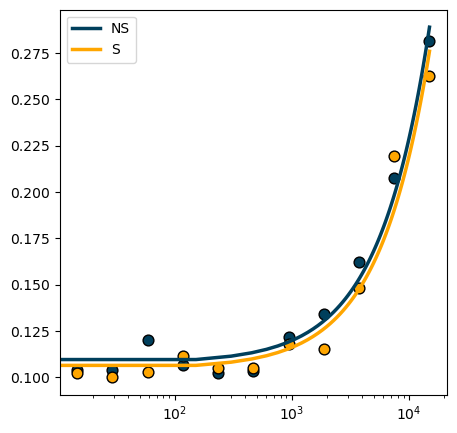

In [23]:
import pathophys as pp
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


parentdir = pp.getparentdir("A")
ds = pp.getdir(parentdir)
dfs = []
i =0
for d in ds:
    b = pp.loadbff(d)
    data = {"Absorbtion":[], "CellC":[], "Group":[], "Try":[]}
    for key in b:
        data["Absorbtion"].append(b[key])
        data["Group"].append(key.split("_")[0])
        cc = 15000*pow(2,((-1)*(int(key.split("_")[1]))))
        data["CellC"].append(cc)
        data["Try"].append(i)
    df = pd.DataFrame(data=data)
    i = i+1

    dfs.append(df)
params = pp.loadparams()
print(params)
df = pd.concat(dfs)
df2 = df[df["Try"]==1]
fig, ax = plt.subplots(figsize = (5, 5))
cc = 0
for c in df2["Group"].unique():
    col = params["Colors"][cc]
    x = df2[df2["Group"]==c]["CellC"]
    y = df2[df2["Group"]==c]["Absorbtion"]
    ax.scatter(x, y, s=60, alpha=1, c=col, edgecolors="k")
    b, a = np.polyfit(x, y, deg=1)
    print
    xseq = np.linspace(0, df2[df2["Group"]==c]["CellC"].max(), num=100)
    line, = ax.plot(xseq, a + b * xseq, color=col, lw=2.5);
    line.set_label(c)
    ax.legend()
    cc = cc+2
ax.set_xscale('log')
